In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv("house-prediction/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [4]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

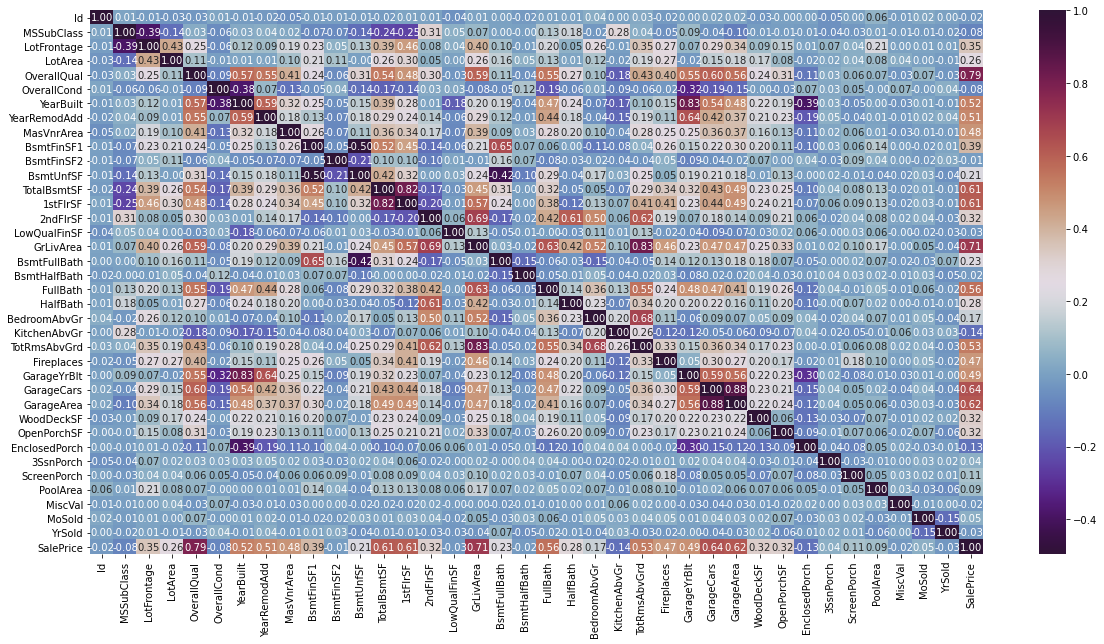

In [5]:
import seaborn as sns
fig, ax=plt.subplots(figsize=(20,10))
ax=sns.heatmap(df.corr(), annot=True, fmt='.2f',cmap='twilight_shifted')

In [6]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice


In [7]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [8]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = df[label].astype('category').cat.as_ordered()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          91 non-null     category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   in

In [10]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            print(label)

LotFrontage
MasVnrArea
GarageYrBlt


In [11]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            df[label].fillna(df[label].median(), inplace=True)

In [12]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            print(label)

Alley
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [13]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label]=pd.Categorical(content).codes + 1

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int8   
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int8   
 6   Alley          1460 non-null   int8   
 7   LotShape       1460 non-null   int8   
 8   LandContour    1460 non-null   int8   
 9   Utilities      1460 non-null   int8   
 10  LotConfig      1460 non-null   int8   
 11  LandSlope      1460 non-null   int8   
 12  Neighborhood   1460 non-null   int8   
 13  Condition1     1460 non-null   int8   
 14  Condition2     1460 non-null   int8   
 15  BldgType       1460 non-null   int8   
 16  HouseStyle     1460 non-null   int8   
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [15]:
df.MSZoning[:10]

0    4
1    4
2    4
3    4
4    4
5    4
6    4
7    4
8    5
9    4
Name: MSZoning, dtype: int8

In [16]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)

X = df.drop('SalePrice',axis=1)
y = df.SalePrice

from sklearn.model_selection import RandomizedSearchCV
grid = {'n_estimators':[100,150,500],
       'max_depth' : [None, 10],
       }

model_rs = RandomizedSearchCV(estimator=model, n_iter=10, param_distributions=grid,
                             cv=5, verbose=2)
model_rs.fit(X, y)



C:\Users\Hi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...................max_depth=None, n_estimators=100; total time=   2.9s
[CV] END ...................max_depth=None, n_estimators=100; total time=   1.0s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.9s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.9s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.9s
[CV] END ...................max_depth=None, n_estimators=150; total time=   1.3s
[CV] END ...................max_depth=None, n_estimators=150; total time=   1.3s
[CV] END ...................max_depth=None, n_estimators=150; total time=   1.8s
[CV] END ...................max_depth=None, n_estimators=150; total time=   1.7s
[CV] END ...................max_depth=None, n_estimators=150; total time=   1.7s
[CV] END ...................max_depth=None, n_estimators=500; total time=   4.7s
[CV] END ...................max_depth=None, n_est

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
                   param_distributions={'max_depth': [None, 10],
                                        'n_estimators': [100, 150, 500]},
                   verbose=2)

In [17]:
model_rs.best_params_

{'n_estimators': 100, 'max_depth': None}

In [33]:
model_rs.score(X,y)

0.9812027952717923

In [18]:
df_1 = pd.read_csv('house-prediction/test.csv')

In [19]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [20]:
for label, content in df_1.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

LotFrontage
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath
GarageYrBlt
GarageCars
GarageArea


In [21]:
for label, content in df_1.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            df_1[label].fillna(df[label].median(),inplace = True)

In [22]:
for label, content in df_1.items():
    if pd.api.types.is_string_dtype(content):
        if pd.isnull(content).sum():
            print(label)

MSZoning
Alley
Utilities
Exterior1st
Exterior2nd
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature
SaleType


In [23]:
for label, content in df_1.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_1[label] = df_1[label].astype('category').cat.as_ordered()

In [24]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1459 non-null   int64   
 1   MSSubClass     1459 non-null   int64   
 2   MSZoning       1455 non-null   category
 3   LotFrontage    1459 non-null   float64 
 4   LotArea        1459 non-null   int64   
 5   Street         1459 non-null   category
 6   Alley          107 non-null    category
 7   LotShape       1459 non-null   category
 8   LandContour    1459 non-null   category
 9   Utilities      1457 non-null   category
 10  LotConfig      1459 non-null   category
 11  LandSlope      1459 non-null   category
 12  Neighborhood   1459 non-null   category
 13  Condition1     1459 non-null   category
 14  Condition2     1459 non-null   category
 15  BldgType       1459 non-null   category
 16  HouseStyle     1459 non-null   category
 17  OverallQual    1459 non-null   in

In [25]:
for label, content in df_1.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_1[label] = pd.Categorical(content).codes+1

In [26]:
df_1.BsmtQual[:10]

0    4
1    4
2    3
3    4
4    3
5    3
6    3
7    3
8    3
9    4
Name: BsmtQual, dtype: int8

In [27]:
y_preds = model_rs.predict(df_1)

In [28]:
y_preds[:10]

array([126791.43, 152311.9 , 179099.11, 182038.46, 197554.05, 184010.4 ,
       169116.84, 175396.42, 182981.63, 117663.5 ])

In [29]:
df_2 = pd.DataFrame()
df_2['Id'] = df_1.Id
df_2['SalePrice'] = y_preds
df_2.to_csv('house-prediction/result.csv', index=False)

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

In [31]:
gb = GradientBoostingRegressor(n_estimators=150, max_depth=11)
gb.fit(X, y)
y_preds = gb.predict(df_1)

In [32]:
df_2 = pd.DataFrame()
df_2['Id'] = df_1.Id
df_2['SalePrice'] = y_preds
df_2.to_csv('house-prediction/result_GB.csv', index=False)